<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Arboles/blob/main/3_Bagging_vs_Boosting_vs_RandomForest_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

[Dataset original](kaggle.com/CooperUnion/cardataset?select=data.csv)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/XavierCarrera/Tutorial-Machine-Learning-Arboles/main/car_features.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [40]:
df.drop(["Make", "Model", "Engine Fuel Type", "Transmission Type", "Driven_Wheels", "Market Category", "Vehicle Size", "Vehicle Style"], axis=1, inplace=True)
df

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [24]:
df.isna().sum()

Year                 0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [41]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

# Análisis Exploratorio de Datos

In [16]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


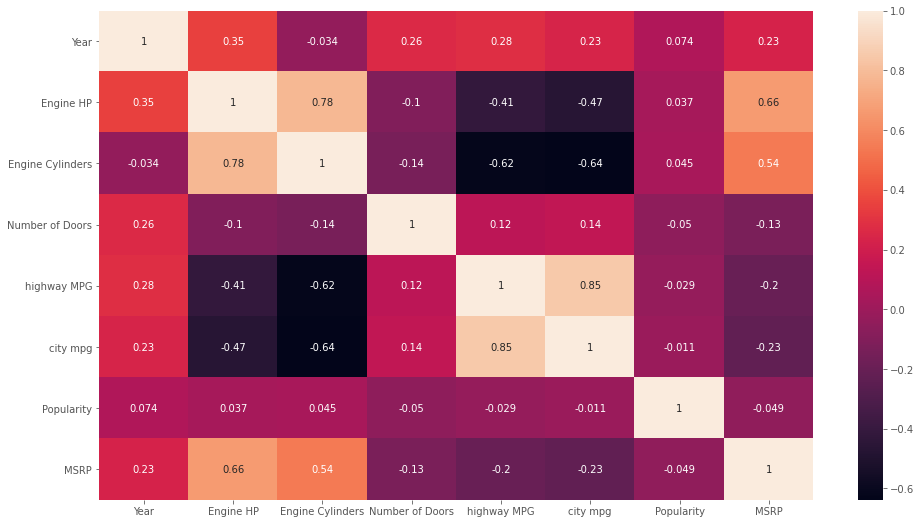

In [42]:
corr = df.corr()
sns.heatmap(corr, annot = True, yticklabels=corr.columns, xticklabels=corr.columns)

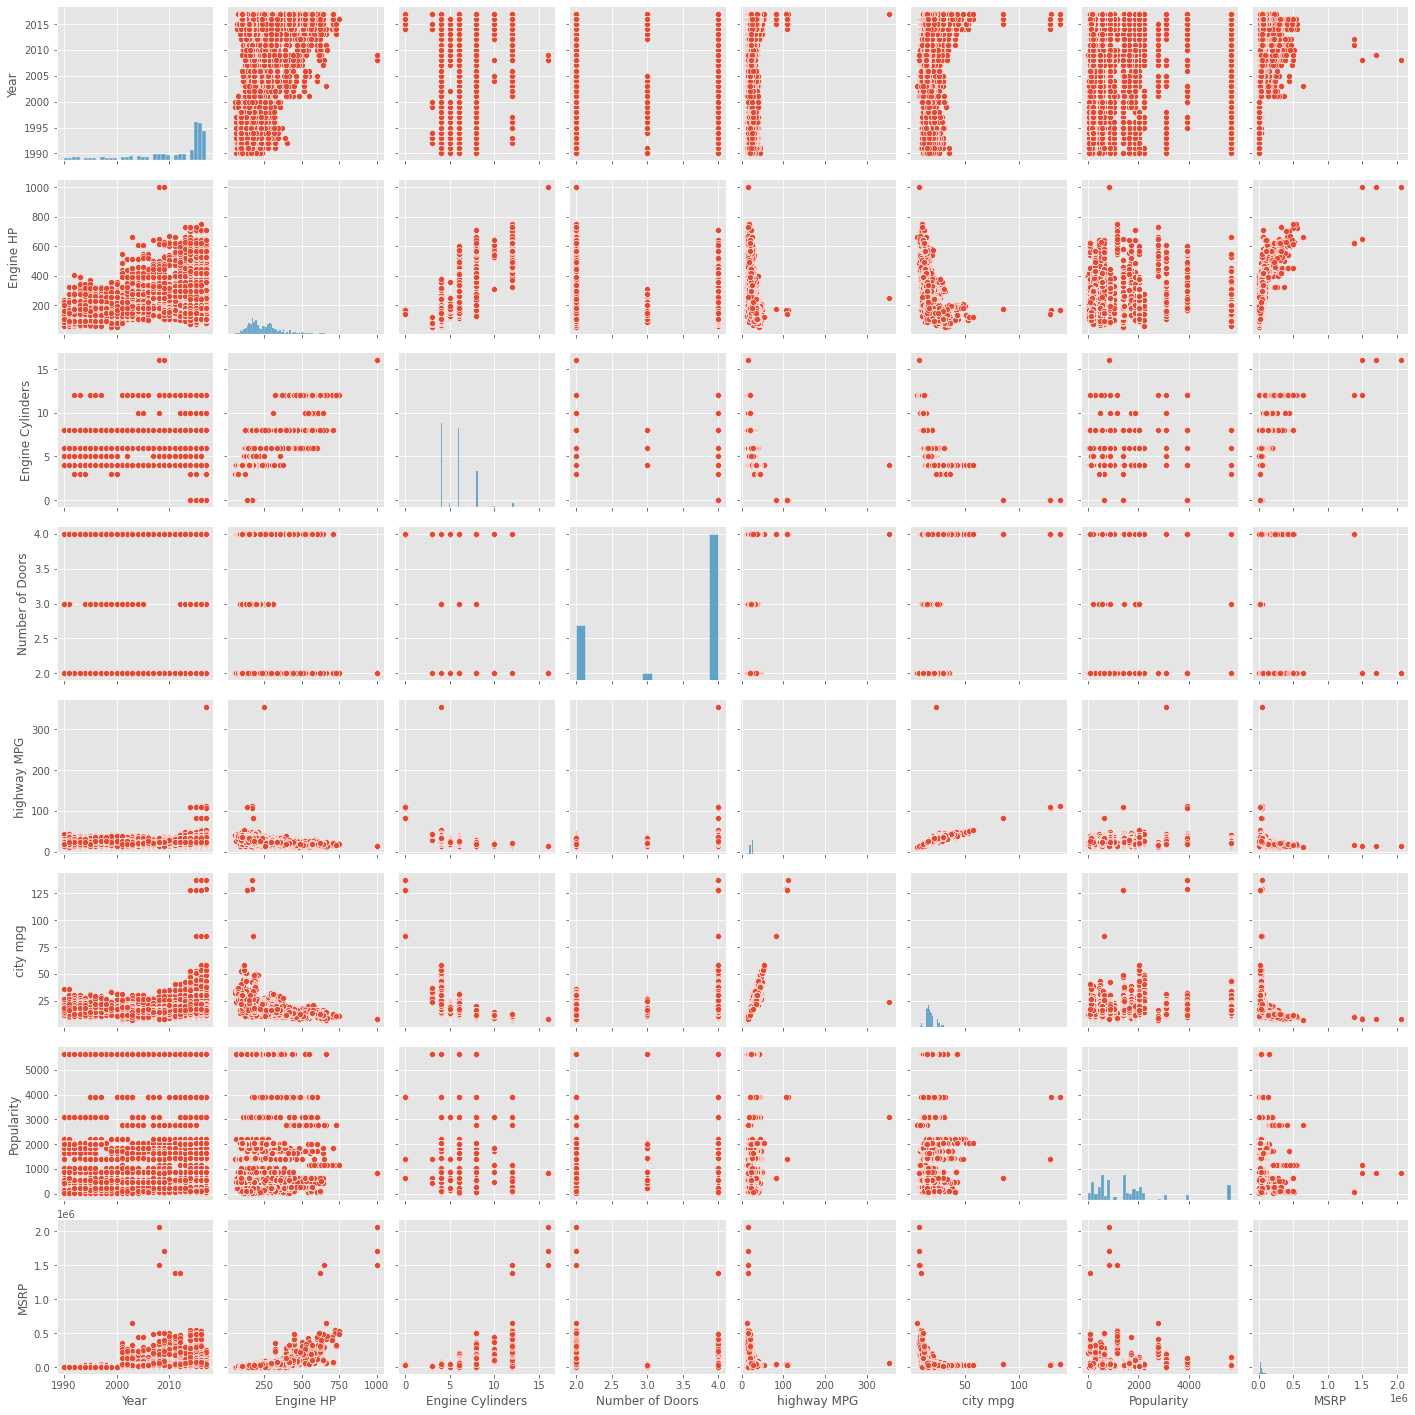

In [43]:
sns.pairplot(df)

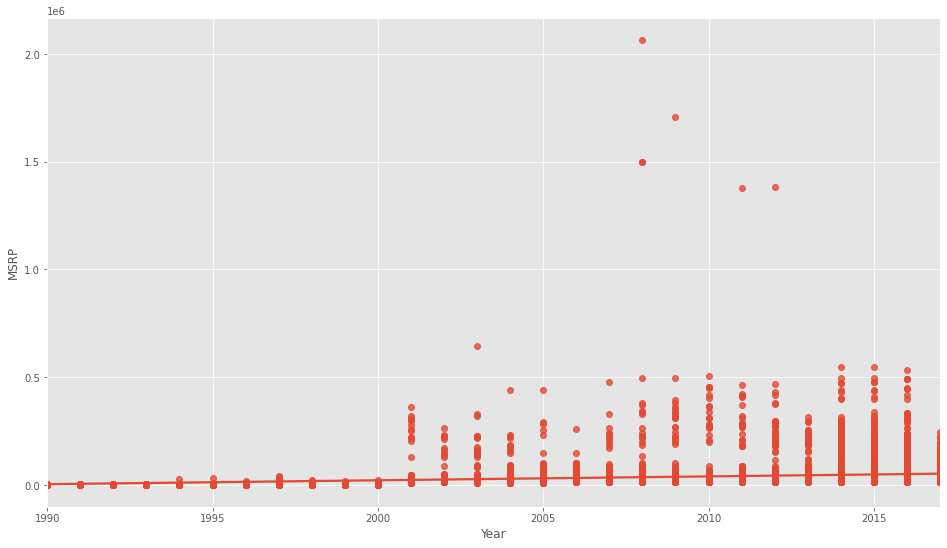

In [52]:
sns.regplot(x=df["Year"], y=df["MSRP"])

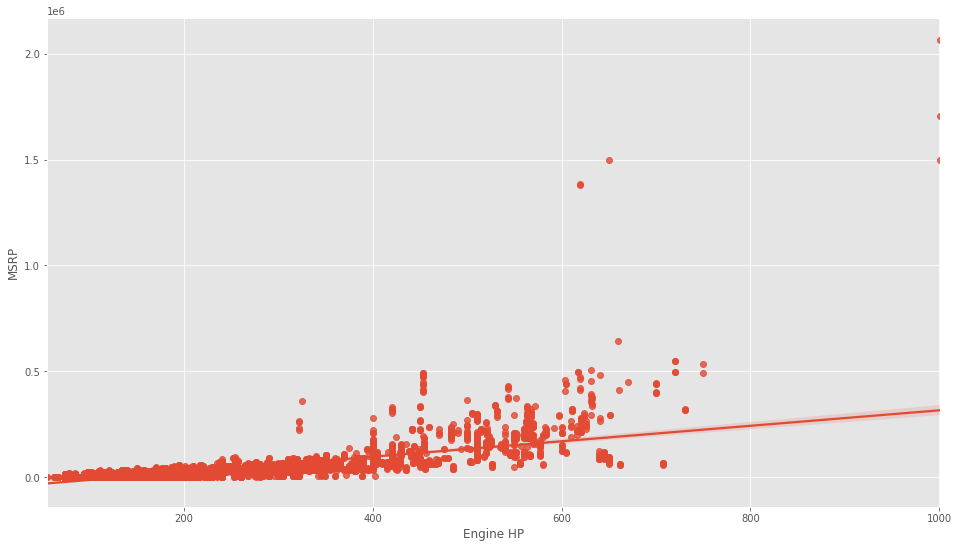

In [51]:
sns.regplot(x=df["Engine HP"], y=df["MSRP"])

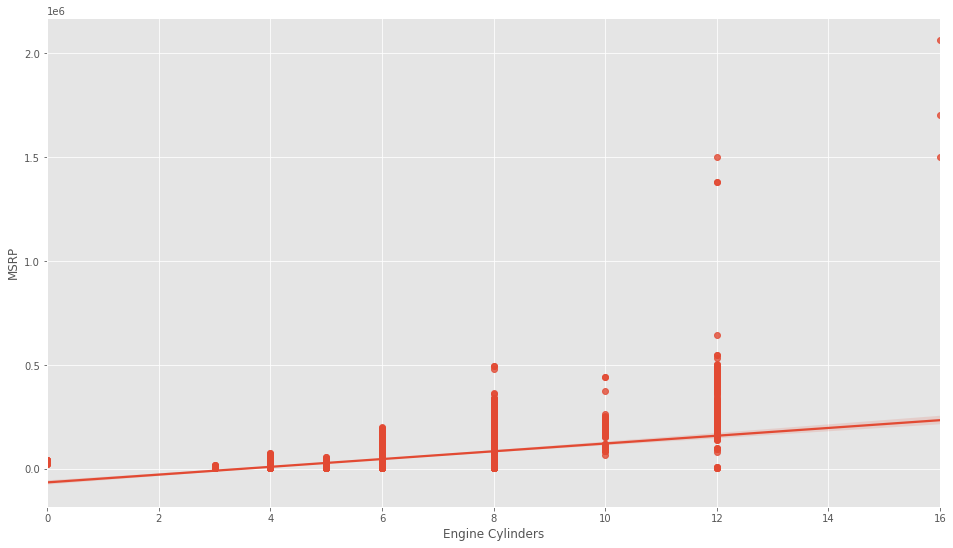

In [50]:
sns.regplot(x=df["Engine Cylinders"], y=df["MSRP"])

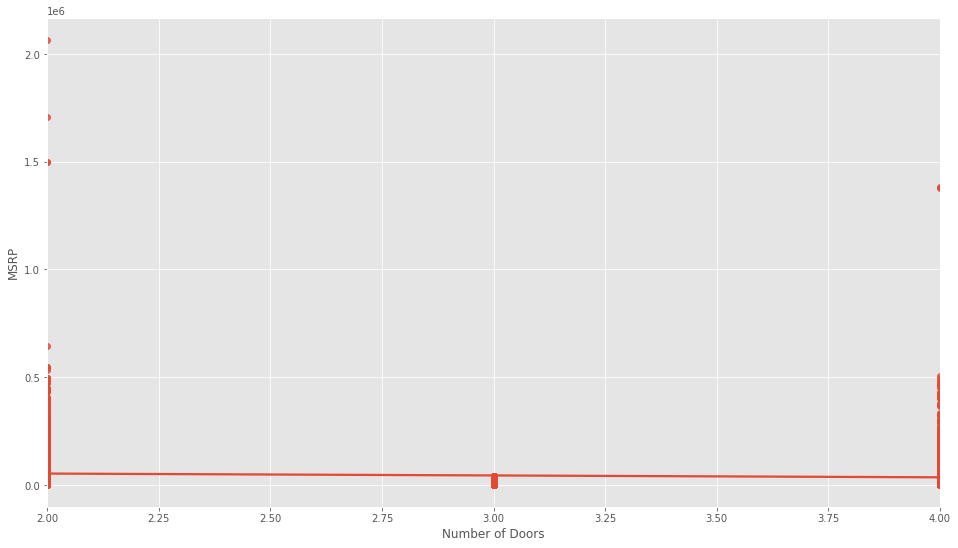

In [49]:
sns.regplot(x=df["Number of Doors"], y=df["MSRP"])

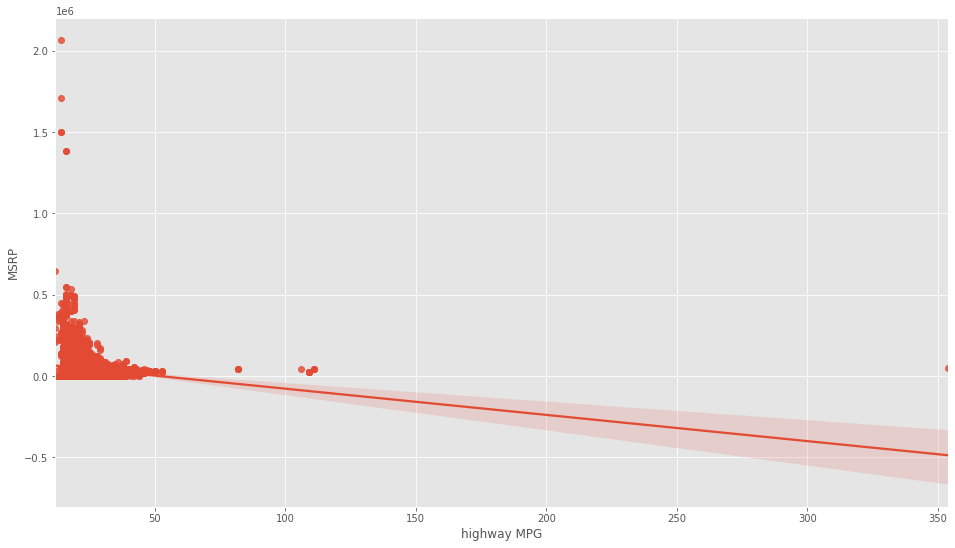

In [48]:
sns.regplot(x=df["highway MPG"], y=df["MSRP"])

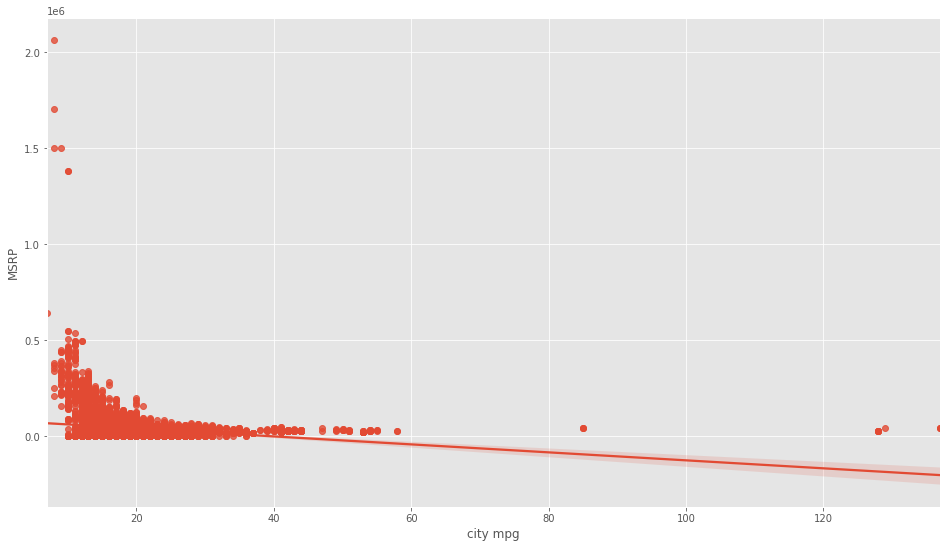

In [47]:
sns.regplot(x=df["city mpg"], y=df["MSRP"])

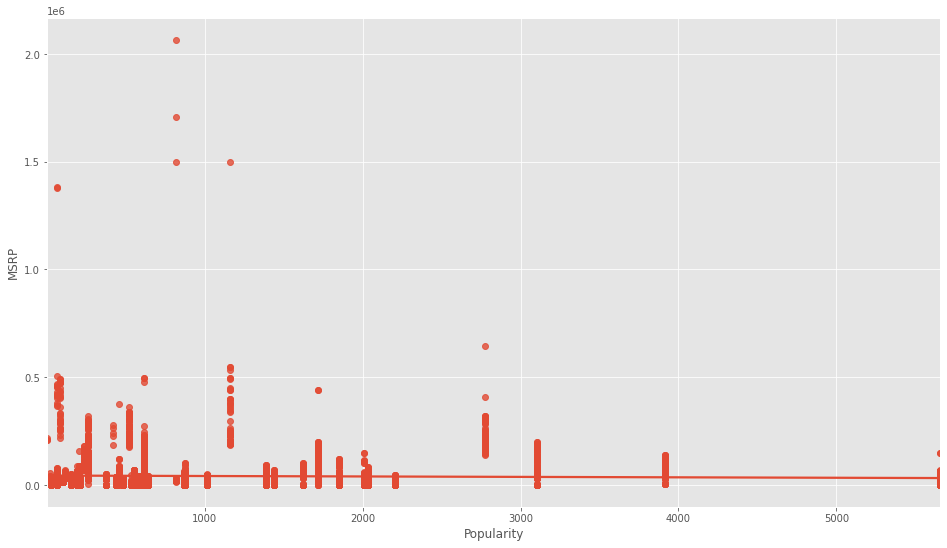

In [46]:
sns.regplot(x=df["Popularity"], y=df["MSRP"])

# Entrenamiento de Modelos

In [55]:
X = df.drop(["MSRP"], axis=1)
y = df["MSRP"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [56]:
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [63]:
boosting = AdaBoostRegressor()
boosting.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [58]:
random = RandomForestRegressor()
random.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
y_bagging_predict = bagging.predict(X_test)
y_boosting_predict = boosting.predict(X_test)
y_random_predict = random.predict(X_test)

In [69]:
mse = mean_squared_error(y_test, y_bagging_predict)
ase = mean_absolute_error(y_test, y_bagging_predict)

print(round(mse))
print(round(ase))

80416507
3785


In [76]:
mse = mean_squared_error(y_test, y_boosting_predict)
ase = mean_absolute_error(y_test, y_boosting_predict)

print(round(mse))
print(round(ase))

470803962
13706
1


In [77]:
mse = mean_squared_error(y_test, y_random_predict)
ase = mean_absolute_error(y_test, y_random_predict)

print(round(mse))
print(round(ase))

62763137
3604
1


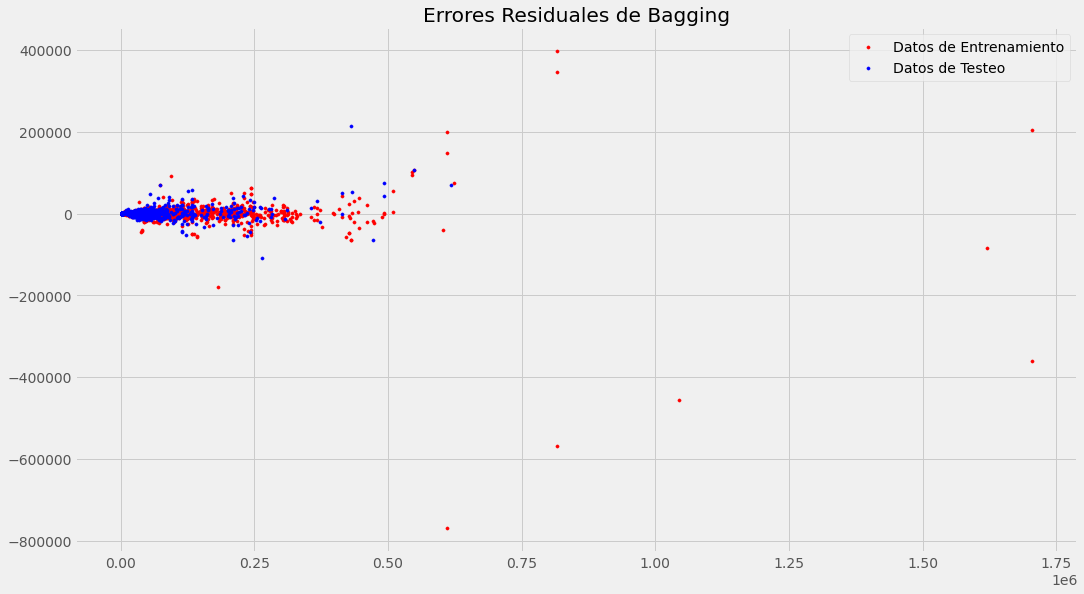

In [73]:
plt.style.use('fivethirtyeight') 
plt.scatter(bagging.predict(X_train), bagging.predict(X_train) - y_train, 
            color = "red", s = 10, label = 'Datos de Entrenamiento')  
plt.scatter(bagging.predict(X_test), bagging.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Datos de Testeo')   
plt.hlines(y = 0, xmin = 0, xmax = 7, linewidth = 2)   
plt.legend(loc = 'upper right') 
plt.title("Errores Residuales de Bagging") 
  
plt.show()

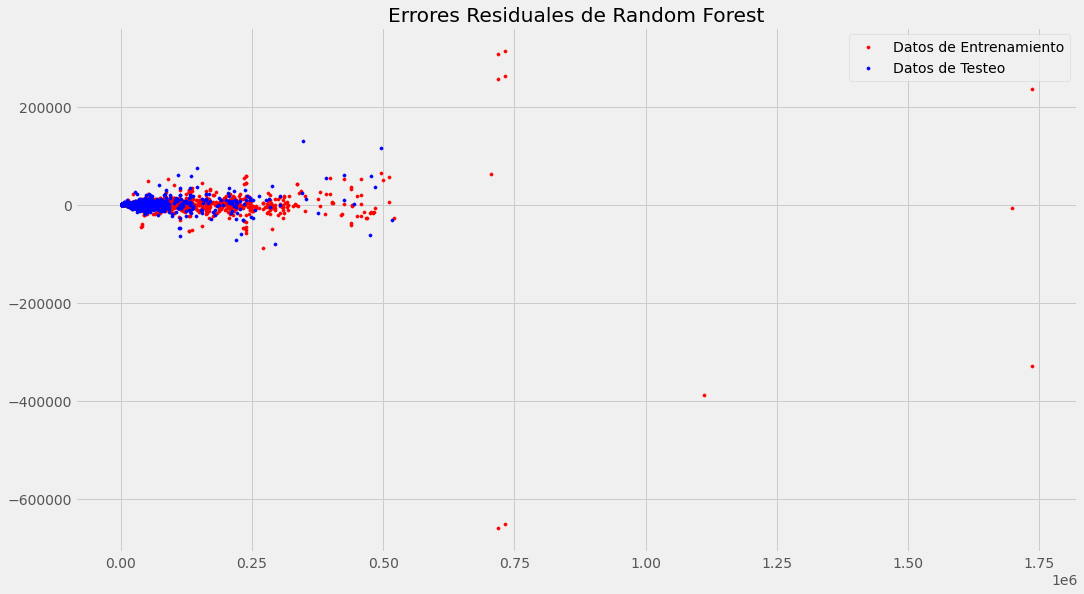

In [74]:
plt.style.use('fivethirtyeight') 
plt.scatter(random.predict(X_train), random.predict(X_train) - y_train, 
            color = "red", s = 10, label = 'Datos de Entrenamiento')  
plt.scatter(random.predict(X_test), random.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Datos de Testeo')   
plt.hlines(y = 0, xmin = 0, xmax = 7, linewidth = 2)   
plt.legend(loc = 'upper right') 
plt.title("Errores Residuales de Random Forest") 
  
plt.show()